# Data Collection - using WebScraping technique

#### Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
request_header = {
    "content-type":"text/html",
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36',
    'accept-encoding': 'gzip, deflate, br, zstd'
}

#### Web Scraping using Requests

In [5]:
company_name = []
Ratings = []
Reviews = []
Industry = []
Location = []
#Salary = []
Jobs = []
Benefits = []
for page in range(1,26):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={page}"
    req = requests.get(url, headers= request_header)
    soup = bs(req.text, "html.parser")

    for i in soup.find_all("div",class_="companyCardWrapper"):

        #name
        name = i.find("h2", class_="companyCardWrapper__companyName")
        clean_companies = [re.findall(r'[A-Za-z&.\s]+', item)[0].strip() for item in name]
        if name:
             company_name.append(clean_companies[0])
        else:
             company_name.append(np.nan)


        #ratings_reviews
        info = i.find("div", class_="companyCardWrapper__companyRatingWrapper")
        if info:
            #ratings
            info_pattern_1 = re.findall(r"\b\d\.\d\b",info.text)
            if info_pattern_1:
                Ratings.append(info_pattern_1[0])
            else:
                Ratings.append(np.nan)
            #reviews
            info_pattern_2 = re.findall(r"\((\d+\.\d+\w+)\)",info.text)
            if info_pattern_2:
                Reviews.append(info_pattern_2[0])
            else:
                Reviews.append(np.nan)


        #industry and location
        industry = i.find("span", class_="companyCardWrapper__interLinking")
        if industry:
            industry_text = industry.text
            industry_match = re.findall(r'([A-Za-z&\s]+)\s*\|', industry_text)
            if industry_match:
                Industry.append(industry_match[0].strip())
            else:
                Industry.append(np.nan)
                
            
            location_match = re.findall(r'\|\s*([A-Za-z\s/]+)\s*\+', industry_text)
            if location_match:
                Location.append(location_match[0].strip())
            else:
                Location.append(np.nan)
        else:
            Industry.append(np.nan)
            Location.append(np.nan)


        #description
        description = i.find("div",class_="companyCardWrapper__tertiaryInformation")
        if description:
            
            # #salaries
            # salaries = re.findall(r'Reviews(\d+\.\d+\w+)\s',description.text)
            # if salaries:
            #     Salary.append(salaries[0])
            # else:
            #     Salary.append(np.nan)

            #jobs
            jobs = re.findall(r'Interviews(\d+(?:\.)?\d+(?:\w+)?)',description.text)
            if jobs:
                Jobs.append(jobs[0])
            else:
                Jobs.append(np.nan)
            
            #benefits
            benefits = re.findall(r'Jobs(\d+(?:\.)?\d+(?:\w+)?)',description.text)
            if benefits:
                Benefits.append(benefits[0])
            else:
                Benefits.append(np.nan)
        

In [41]:
#company_name = []
# Ratings = []
# Reviews = []
# Industry = []
# Location = []
# #Salary = []
# Jobs = []
Salary_link = []

for page in range(1,17):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={page}"
    req = requests.get(url, headers= request_header)
    soup = bs(req.text, "html.parser")

    for main_container in soup.find_all("div",class_="companyCardWrapper"):
        for sub_main_container in main_container.find_all("h2",class_="companyCardWrapper__companyName"):
            company_name = sub_main_container.text.strip()
            a = company_name.split(" ")
            b = "-".join(a)
            each_cmp_link = "https://www.ambitionbox.com/overview/" + b + "-overview"
            #print(each_cmp_link)
            req_each_cmp_link = requests.get(each_cmp_link, headers= request_header)
            soup_each_cmp_link = bs(req_each_cmp_link.text, "html.parser")
            
            company_name = soup_each_cmp_link.find_all("span",class_="inline-flex items-center")
            if company_name:
                for k in company_name:
                    print(k.text)

            main_salary_container = soup_each_cmp_link.find_all("div",class_="bg-white sticky top-0 z-[8] border-b border-b-misc-1")
            for l in main_salary_container:
                for lm in l.find_all("a"):
                    print(lm.get("href"))

            company_slug = b.lower()
            salary_link = f"https://www.ambitionbox.com/salaries/{company_slug}-salaries"
            Salary_link.append(salary_link)
            
for page in range(17,26):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={page}"
    req = requests.get(url, headers= request_header)
    soup = bs(req.text, "html.parser")

    for main_container in soup.find_all("div",class_="companyCardWrapper"):
        for sub_main_container in main_container.find_all("h2",class_="companyCardWrapper__companyName"):
            company_name = sub_main_container.text.strip()
            a = company_name.split(" ")
            b = "-".join(a)
            each_cmp_link = "https://www.ambitionbox.com/overview/" + b + "-overview"
            #print(each_cmp_link)
            req_each_cmp_link = requests.get(each_cmp_link, headers= request_header)
            soup_each_cmp_link = bs(req_each_cmp_link.text, "html.parser")
            
            # company_name = soup_each_cmp_link.find_all("span",class_="inline-flex items-center")
            # if company_name:
            #     for k in company_name:
            #         print(k.text)

            main_salary_container = soup_each_cmp_link.find_all("div",class_="bg-white sticky top-0 z-[8] border-b border-b-misc-1")
            for l in main_salary_container:
                for lm in l.find_all("a"):
                    print(lm.get("href"))

            company_slug = b.lower()
            salary_link = f"https://www.ambitionbox.com/salaries/{company_slug}-salaries"
            Salary_link.append(salary_link)            

TCS
/overview/tcs-overview
/reviews/tcs-reviews
/salaries/tcs-salaries
/interviews/tcs-interview-questions
/jobs/tcs-jobs
/benefits/tcs-benefits
/photos/tcs-photos
/discussions/tcs-discussions
Accenture
/overview/accenture-overview
/reviews/accenture-reviews
/salaries/accenture-salaries
/interviews/accenture-interview-questions
/jobs/accenture-jobs
/benefits/accenture-benefits
/photos/accenture-photos
/discussions/accenture-discussions
Wipro
/overview/wipro-overview
/reviews/wipro-reviews
/salaries/wipro-salaries
/interviews/wipro-interview-questions
/jobs/wipro-jobs
/benefits/wipro-benefits
/photos/wipro-photos
/discussions/wipro-discussions
Cognizant
/overview/cognizant-overview
/reviews/cognizant-reviews
/salaries/cognizant-salaries
/interviews/cognizant-interview-questions
/jobs/cognizant-jobs
/benefits/cognizant-benefits
/photos/cognizant-photos
/discussions/cognizant-discussions
Capgemini
/overview/capgemini-overview
/reviews/capgemini-reviews
/salaries/capgemini-salaries
/interv

In [42]:
Salary_link

['https://www.ambitionbox.com/salaries/tcs-salaries',
 'https://www.ambitionbox.com/salaries/accenture-salaries',
 'https://www.ambitionbox.com/salaries/wipro-salaries',
 'https://www.ambitionbox.com/salaries/cognizant-salaries',
 'https://www.ambitionbox.com/salaries/capgemini-salaries',
 'https://www.ambitionbox.com/salaries/hdfc-bank-salaries',
 'https://www.ambitionbox.com/salaries/infosys-salaries',
 'https://www.ambitionbox.com/salaries/icici-bank-salaries',
 'https://www.ambitionbox.com/salaries/hcltech-salaries',
 'https://www.ambitionbox.com/salaries/tech-mahindra-salaries',
 'https://www.ambitionbox.com/salaries/genpact-salaries',
 'https://www.ambitionbox.com/salaries/teleperformance-salaries',
 'https://www.ambitionbox.com/salaries/axis-bank-salaries',
 'https://www.ambitionbox.com/salaries/concentrix-corporation-salaries',
 'https://www.ambitionbox.com/salaries/jio-salaries',
 'https://www.ambitionbox.com/salaries/amazon-salaries',
 'https://www.ambitionbox.com/salaries/ie

In [45]:
len(Salary_link)

500

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options as ChromeOptions
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

# Setup WebDriver for Chrome (no Edge)
service = ChromeService(ChromeDriverManager().install())
options = ChromeOptions()
options.add_argument("--start-maximized")

driver = webdriver.Chrome(service=service, options=options)

# Salary URL
Salary = []
for Url in Salary_link:
    url = Url
    driver.get(url)

    # wait a bit for the dynamic content to load
    time.sleep(3)

    # Parse page
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Extract data
    cards = soup.find_all("tr", class_="jobProfiles-table__row")
    #print(cards)# Each product card
    data = []
    cleaned_avg_salaries = []
    

    for card in cards:
        sal = card.find("p", class_="salary-range salary-range locked")
        if sal:
            text = sal.get_text(separator=" ").strip()

            # Keep only numbers & decimal points
            nums = [n.replace("₹", "").replace("L/yr", "").strip()
                for n in text.split() if any(c.isdigit() for c in n)]

            if len(nums) >= 2:
                try:
                    min_sal = float(nums[0])
                    max_sal = float(nums[1])
                    avg = (min_sal + max_sal) / 2
                    cleaned_avg_salaries.append(avg)
                except:
                    cleaned_avg_salaries.append(np.nan)
            else:
                cleaned_avg_salaries.append(np.nan)
        else:
            cleaned_avg_salaries.append(np.nan)

    overall_avg_salary = np.mean(cleaned_avg_salaries)
    Salary.append(overall_avg_salary*100000)

In [ ]:
len(Salary)

In [44]:
clean_salary = [
    int(x) if not np.isnan(x) else np.nan 
    for x in Salary
]

In [29]:
clean_salary

[937500,
 1020249,
 1064999,
 1110250,
 1105000,
 946500,
 1108750,
 901750,
 nan,
 922749,
 1272750,
 369749,
 1051000,
 414250,
 1222750,
 1351000,
 408499,
 682500,
 1668499,
 1301000,
 286750,
 nan,
 1589750,
 1002999,
 1286750,
 1114250,
 nan,
 873000,
 832750,
 642250,
 651500,
 nan,
 986000,
 770500,
 1338500,
 897999,
 2025500,
 861999,
 nan,
 531500,
 655250,
 346250,
 636250,
 296500,
 1232500,
 1160750,
 932499,
 411000,
 297500,
 1002249,
 1333000,
 760500,
 317250,
 1019249,
 948750,
 424250,
 1133750,
 941250,
 1982749,
 1363000,
 1807249,
 nan,
 1198999,
 347999,
 609249,
 665000,
 nan,
 869999,
 nan,
 508000,
 999000,
 1301250,
 nan,
 669000,
 887249,
 1075500,
 565499,
 419750,
 1560250,
 1040499,
 520999,
 679000,
 nan,
 987999,
 1383500,
 1616250,
 nan,
 nan,
 424499,
 2534500,
 1178750,
 nan,
 374250,
 722000,
 444499,
 1438500,
 950000,
 1353999,
 669000,
 417250,
 2042250,
 841250,
 724000,
 644750,
 nan,
 nan,
 445749,
 1221000,
 495750,
 nan,
 1935749,
 1146250,

In [10]:
clean_salary = [937500,
 1020249,
 1064999,
 1110250,
 1105000,
 946500,
 1108750,
 901750,
 np.nan,
 922749,
 1272750,
 369749,
 1051000,
 414250,
 1222750,
 1351000,
 408499,
 682500,
 1668499,
 1301000,
 286750,
 np.nan,
 1589750,
 1002999,
 1286750,
 1114250,
 np.nan,
 873000,
 832750,
 642250,
 651500,
 np.nan,
 986000,
 770500,
 1338500,
 897999,
 2025500,
 861999,
 np.nan,
 531500,
 655250,
 346250,
 636250,
 296500,
 1232500,
 1160750,
 932499,
 411000,
 297500,
 1002249,
 1333000,
 760500,
 317250,
 1019249,
 948750,
 424250,
 1133750,
 941250,
 1982749,
 1363000,
 1807249,
 np.nan,
 1198999,
 347999,
 609249,
 665000,
 np.nan,
 869999,
 np.nan,
 508000,
 999000,
 1301250,
 np.nan,
 669000,
 887249,
 1075500,
 565499,
 419750,
 1560250,
 1040499,
 520999,
 679000,
 np.nan,
 987999,
 1383500,
 1616250,
 np.nan,
 np.nan,
 424499,
 2534500,
 1178750,
 np.nan,
 374250,
 722000,
 444499,
 1438500,
 950000,
 1353999,
 669000,
 417250,
 2042250,
 841250,
 724000,
 644750,
 np.nan,
 np.nan,
 445749,
 1221000,
 495750,
 np.nan,
 1935749,
 1146250,
 365750,
 396250,
 489749,
 533250,
 1400749,
 1585250,
 910249,
 2169999,
 466000,
 810749,
 1069000,
 1153500,
 470999,
 np.nan,
 931750,
 1221000,
 1330250,
 1056750,
 630749,
 612750,
 1296250,
 610749,
 1865250,
 418999,
 1069500,
 811499,
 1178749,
 1490000,
 452499,
 1571500,
 2188749,
 800250,
 399999,
 300750,
 563249,
 np.nan,
 1068250,
 359250,
 1041249,
 np.nan,
 1335000,
 922749,
 1831750,
 677750,
 np.nan,
 533000,
 np.nan,
 690250,
 506750,
 759749,
 1243749,
 767499,
 1724250,
 848500,
 499250,
 557750,
 452500,
 834750,
 935000,
 762750,
 np.nan,
 595000,
 681999,
 960500,
 1007749,
 939749,
 754250,
 1085250,
 1497250,
 1032749,
 662750,
 658499,
 967750,
 963999,
 938500,
 1255750,
 818500,
 512500,
 1166000,
 767500,
 1808749,
 435250,
 1299750,
 381500,
 np.nan,
 2358000,
 2119999,
 1127250,
 404000,
 np.nan,
 527000,
 541750,
 760500,
 623000,
 1369000,
 779249,
 1099750,
 1458500,
 267000,
 np.nan,
 521249,
 999000,
 1170000,
 1716000,
 1191750,
 708250,
 2029500,
 694500,
 989750,
 576750,
 1360000,
 417750,
 np.nan,
 709749,
 np.nan,
 900250,
 418750,
 551499,
 1169500,
 564250,
 np.nan,
 478500,
 1573499,
 np.nan,
 2186999,
 937500,
 784499,
 np.nan,
 1115500,
 584500,
 598000,
 1759250,
 1456250,
 1621249,
 779750,
 1671500,
 485750,
 1803250,
 711750,
 968499,
 445249,
 537500,
 564250,
 475500,
 1420499,
 735750,
 1183750,
 1041499,
 639500,
 1185500,
 659749,
 366000,
 543250,
 514249,
 2457750,
 486500,
 630500,
 2857750,
 873500,
 656000,
 np.nan,
 584500,
 556000,
 723000,
 1728250,
 359000,
 790250,
 760499,
 274250,
 1380999,
 520999,
 571250,
 1539750,
 1128750,
 382000,
 508499,
 1340750,
 552750,
 1460000,
 977249,
 np.nan,
 678999,
 1044250,
 540999,
 1101750,
 627000,
 627750,
 425500,
 1535249,
 472750,
 254999,
 1146750,
 810750,
 730000,
 727250,
 394749,
 660500,
 np.nan,
 449250,
 830749,
 813500,
 620499,
 2381250,
 733750,
 912000,
 718000,
 489499,
 1203250,
 np.nan,
 467000,
 1405000,
 706999,
 619499,
 np.nan,
 442000,
 771250,
 1776750,
 418250,
 np.nan,
 731500,
 605250,
 743500,
 543750,
 np.nan,
 649000,
 892750,
 528500,
 1003500,
 696249,
 np.nan,
 667750,
 696500,
 873500,
 1519750,
 np.nan,
 1413749,
 364500,
 669000,
 389000,
 939250,
 1142000,
 638750,
 699000,
 690999,
 527750,
 508750,
 1355500,
 np.nan,
 649750,
 727000,
 368749,
 np.nan,
 476999,
 631999,
 882250,
 556500,
 np.nan,
 898750,
 610000,
 387500,
 499250,
 np.nan,
 914500,
 1550250,
 720250,
 1109500,
 289250,
 1409750,
 1409750,
 1299500,
 612000,
 908000,
 712500,
 845250,
 1257749,
 1426000,
 1452500,
 970499,
 604500,
 np.nan,
 426500,
 438249,
 821500,
 1503750,
 626000,
 1332250,
 554249,
 409749,
 1464750,
 602000,
 1150500,
 553250,
 611500,
 409250,
 492250,
 1391750,
 701249,
 544499,
 489749,
 np.nan,
 455500,
 447750,
 1640750,
 np.nan,
 1178500,
 240000,
 888000,
 1121000,
 988250,
 2314250,
 517250,
 599000,
 688000,
 751750,
 1232000,
 805000,
 706250,
 623250,
 690999,
 1740250,
 713000,
 1883500,
 1238500,
 805500,
 1696750,
 1725250,
 np.nan,
 475250,
 490750,
 3668750,
 1285250,
 1357999,
 553750,
 586500,
 1216749,
 815749,
 343500,
 1083250,
 670750,
 np.nan,
 478749,
 np.nan,
 369250,
 469500,
 750750,
 563250,
 448000,
 928500,
 2449499,
 1069500,
 561499,
 395750,
 863250,
 np.nan,
 370249,
 310250,
 911750,
 1173000,
 1461000,
 646000,
 1676750,
 614750,
 1614500,
 774500,
 1336500,
 854749,
 462500,
 1204500,
 2495750,
 2136250,
 2378750,
 1289250,
 1344000,
 1345750,
 np.nan,
 683000,
 2413250,
 np.nan,
 527500,
 3831249,
 1054000,
 1403000,
 693749,
 683250,
 np.nan,
 630250,
 592000,
 2074500]

#### Converting Scraped (Collected Data) into DataFrame

In [2]:
document = {"Company":company_name, "Ratings":Ratings, "Reviews":Reviews, "Industry":Industry, "Location":Location, "Salary":clean_salary, "Jobs":Jobs, "Benefits":Benefits}
df = pd.DataFrame(document)
df

NameError: name 'company_name' is not defined

#### converting dataframe to csv

In [13]:
df.to_csv("Fortune 500 Companies.csv", index=False)

In [14]:
df

,Company,Ratings,Reviews,Industry,Location,Salary,Jobs,Benefits
0,TCS,3.4,1.1L,IT Services & Consulting,Bangalore / Bengaluru,937500.0,1.4k,10.6k
1,Accenture,3.7,69.6k,IT Services & Consulting,Bangalore / Bengaluru,1020249.0,38.9k,6.7k
2,Wipro,3.6,61.9k,IT Services & Consulting,Hyderabad / Secunderabad,1064999.0,4.9k,4.6k
3,Cognizant,3.7,58.9k,IT Services & Consulting,Hyderabad / Secunderabad,1110250.0,821,5.5k
4,Capgemini,3.7,50.5k,IT Services & Consulting,Bangalore / Bengaluru,1105000.0,2.1k,3.6k
...,...,...,...,...,...,...,...,...
495,R.R. Donnelley,3.7,1.9k,Marketing & Advertising,Chennai,683250.0,22,243
496,Manipal Hospitals,4.0,1.9k,Healthcare,Bangalore / Bengaluru,NaN,97,131
497,Dr Lal PathLabs,4.2,1.9k,Healthcare,New Delhi,630250.0,71,192
498,Philips,3.8,1.9k,Medical Equipment,Bangalore / Bengaluru,592000.0,117,180


# Data Analysis Part

In [22]:
df_1 = pd.read_csv("Fortune 500 Companies.csv")

In [23]:
df_1.head()

,Company,Ratings,Reviews,Industry,Location,Salary,Jobs,Benefits
0,TCS,3.4,1.1L,IT Services & Consulting,Bangalore / Bengaluru,937500.0,1.4k,10.6k
1,Accenture,3.7,69.6k,IT Services & Consulting,Bangalore / Bengaluru,1020249.0,38.9k,6.7k
2,Wipro,3.6,61.9k,IT Services & Consulting,Hyderabad / Secunderabad,1064999.0,4.9k,4.6k
3,Cognizant,3.7,58.9k,IT Services & Consulting,Hyderabad / Secunderabad,1110250.0,821,5.5k
4,Capgemini,3.7,50.5k,IT Services & Consulting,Bangalore / Bengaluru,1105000.0,2.1k,3.6k


In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   498 non-null    object 
 1   Ratings   500 non-null    float64
 2   Reviews   441 non-null    object 
 3   Industry  497 non-null    object 
 4   Location  497 non-null    object 
 5   Salary    447 non-null    float64
 6   Jobs      354 non-null    object 
 7   Benefits  492 non-null    object 
dtypes: float64(2), object(6)
memory usage: 31.4+ KB


In [25]:
df_1.shape

(500, 8)

In [26]:
#Converting the datatype of ratings column from object to float type
df_1['Ratings'] = pd.to_numeric(df_1['Ratings'], errors='coerce')

In [27]:
df_1['Ratings'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Ratings
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [28]:
print(df_1['Reviews'].head(10).tolist())

['1.1L', '69.6k', '61.9k', '58.9k', '50.5k', '49.2k', '46.3k', '44.4k', '43.5k', '41.6k']


In [29]:
df_1['Reviews'] = df_1['Reviews'].astype(str)
df_1['Reviews'] = df_1['Reviews'].str.replace(r'\s+', '', regex=True)

In [30]:
def convert_to_number(x):
    if pd.isna(x) or x.strip() == '':
        return np.nan
    
    x = str(x).strip().lower()
    
    match = re.search(r'([\d\.]+)\s*([kl]?)', x)  # captures number + unit (k or l)
    if not match:
        return np.nan

    num, unit = match.groups()
    num = float(num)

    if unit == 'k':
        return num * 1_000
    elif unit == 'l':
        return num * 100_000
    else:
        return num

In [31]:
df_1['Reviews'] = df_1['Reviews'].apply(convert_to_number)
df_1['Jobs'] = df_1['Jobs'].apply(convert_to_number)
df_1['Benefits'] = df_1['Benefits'].apply(convert_to_number)

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   498 non-null    object 
 1   Ratings   500 non-null    float64
 2   Reviews   441 non-null    float64
 3   Industry  497 non-null    object 
 4   Location  497 non-null    object 
 5   Salary    447 non-null    float64
 6   Jobs      354 non-null    float64
 7   Benefits  492 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [33]:
df_1.describe()

,Ratings,Reviews,Salary,Jobs,Benefits
count,500.000000,441.000000,4.470000e+02,354.000000,492.000000
mean,3.809400,5944.217687,9.395630e+05,324.296610,483.439024
std,0.297369,9684.792173,5.162221e+05,2128.148191,836.262051
min,2.700000,1900.000000,2.400000e+05,10.000000,10.000000
25%,3.600000,2400.000000,5.596245e+05,28.000000,186.000000
50%,3.900000,3300.000000,8.050000e+05,64.000000,269.500000
75%,4.000000,5300.000000,1.195374e+06,153.750000,439.500000
max,4.900000,110000.000000,3.831249e+06,38900.000000,10600.000000


In [34]:
df_1

,Company,Ratings,Reviews,Industry,Location,Salary,Jobs,Benefits
0,TCS,3.4,110000.0,IT Services & Consulting,Bangalore / Bengaluru,937500.0,1400.0,10600.0
1,Accenture,3.7,69600.0,IT Services & Consulting,Bangalore / Bengaluru,1020249.0,38900.0,6700.0
2,Wipro,3.6,61900.0,IT Services & Consulting,Hyderabad / Secunderabad,1064999.0,4900.0,4600.0
3,Cognizant,3.7,58900.0,IT Services & Consulting,Hyderabad / Secunderabad,1110250.0,821.0,5500.0
4,Capgemini,3.7,50500.0,IT Services & Consulting,Bangalore / Bengaluru,1105000.0,2100.0,3600.0
...,...,...,...,...,...,...,...,...
495,R.R. Donnelley,3.7,1900.0,Marketing & Advertising,Chennai,683250.0,22.0,243.0
496,Manipal Hospitals,4.0,1900.0,Healthcare,Bangalore / Bengaluru,NaN,97.0,131.0
497,Dr Lal PathLabs,4.2,1900.0,Healthcare,New Delhi,630250.0,71.0,192.0
498,Philips,3.8,1900.0,Medical Equipment,Bangalore / Bengaluru,592000.0,117.0,180.0


In [35]:
# #Outliers removing
# num_cols = df_1.select_dtypes(include=['float64']).columns
# for col in num_cols:
#     Q1 = df_1[col].quantile(0.25)
#     Q3 = df_1[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df_1 = df_1[(df_1[col] >= lower_bound) & (df_1[col] <= upper_bound)]


In [36]:
# df_1.shape  # q1 =df.quantile(0.25)

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   498 non-null    object 
 1   Ratings   500 non-null    float64
 2   Reviews   441 non-null    float64
 3   Industry  497 non-null    object 
 4   Location  497 non-null    object 
 5   Salary    447 non-null    float64
 6   Jobs      354 non-null    float64
 7   Benefits  492 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [38]:
df_1.describe()

,Ratings,Reviews,Salary,Jobs,Benefits
count,500.000000,441.000000,4.470000e+02,354.000000,492.000000
mean,3.809400,5944.217687,9.395630e+05,324.296610,483.439024
std,0.297369,9684.792173,5.162221e+05,2128.148191,836.262051
min,2.700000,1900.000000,2.400000e+05,10.000000,10.000000
25%,3.600000,2400.000000,5.596245e+05,28.000000,186.000000
50%,3.900000,3300.000000,8.050000e+05,64.000000,269.500000
75%,4.000000,5300.000000,1.195374e+06,153.750000,439.500000
max,4.900000,110000.000000,3.831249e+06,38900.000000,10600.000000


In [39]:
df_1["Salary"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
447 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [40]:
df_1.head()

,Company,Ratings,Reviews,Industry,Location,Salary,Jobs,Benefits
0,TCS,3.4,110000.0,IT Services & Consulting,Bangalore / Bengaluru,937500.0,1400.0,10600.0
1,Accenture,3.7,69600.0,IT Services & Consulting,Bangalore / Bengaluru,1020249.0,38900.0,6700.0
2,Wipro,3.6,61900.0,IT Services & Consulting,Hyderabad / Secunderabad,1064999.0,4900.0,4600.0
3,Cognizant,3.7,58900.0,IT Services & Consulting,Hyderabad / Secunderabad,1110250.0,821.0,5500.0
4,Capgemini,3.7,50500.0,IT Services & Consulting,Bangalore / Bengaluru,1105000.0,2100.0,3600.0


In [41]:
df_1.isnull().sum()

Company       2
Ratings       0
Reviews      59
Industry      3
Location      3
Salary       53
Jobs        146
Benefits      8
dtype: int64

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
#Handling missing values by filling values
df_1['Company'].fillna('Unknown', inplace=True)
df_1['Reviews'].fillna(0, inplace=True)
df_1['Industry'].fillna('Unknown', inplace=True)
df_1['Location'].fillna('Unknown', inplace=True)
df_1['Salary'].fillna(df_1['Salary'].median(), inplace=True)
df_1['Jobs'].fillna(0, inplace=True)
df_1['Benefits'].fillna(0, inplace=True)


In [44]:
df_1.isnull().sum()

Company     0
Ratings     0
Reviews     0
Industry    0
Location    0
Salary      0
Jobs        0
Benefits    0
dtype: int64

In [45]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   500 non-null    object 
 1   Ratings   500 non-null    float64
 2   Reviews   500 non-null    float64
 3   Industry  500 non-null    object 
 4   Location  500 non-null    object 
 5   Salary    500 non-null    float64
 6   Jobs      500 non-null    float64
 7   Benefits  500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [46]:
df_1.head()

,Company,Ratings,Reviews,Industry,Location,Salary,Jobs,Benefits
0,TCS,3.4,110000.0,IT Services & Consulting,Bangalore / Bengaluru,937500.0,1400.0,10600.0
1,Accenture,3.7,69600.0,IT Services & Consulting,Bangalore / Bengaluru,1020249.0,38900.0,6700.0
2,Wipro,3.6,61900.0,IT Services & Consulting,Hyderabad / Secunderabad,1064999.0,4900.0,4600.0
3,Cognizant,3.7,58900.0,IT Services & Consulting,Hyderabad / Secunderabad,1110250.0,821.0,5500.0
4,Capgemini,3.7,50500.0,IT Services & Consulting,Bangalore / Bengaluru,1105000.0,2100.0,3600.0


In [47]:
df_1.describe()

,Ratings,Reviews,Salary,Jobs,Benefits
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000
mean,3.809400,5242.800000,9.252993e+05,229.602000,475.704000
std,0.297369,9294.619307,4.897965e+05,1796.017211,831.750806
min,2.700000,0.000000,2.400000e+05,0.000000,0.000000
25%,3.600000,2200.000000,5.972500e+05,0.000000,182.750000
50%,3.900000,2900.000000,8.050000e+05,34.000000,267.000000
75%,4.000000,4700.000000,1.147688e+06,108.000000,435.250000
max,4.900000,110000.000000,3.831249e+06,38900.000000,10600.000000


In [48]:
df_1.describe(include="object")

,Company,Industry,Location
count,500,500,500
unique,499,58,43
top,Unknown,IT Services & Consulting,Bangalore / Bengaluru
freq,2,70,111


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

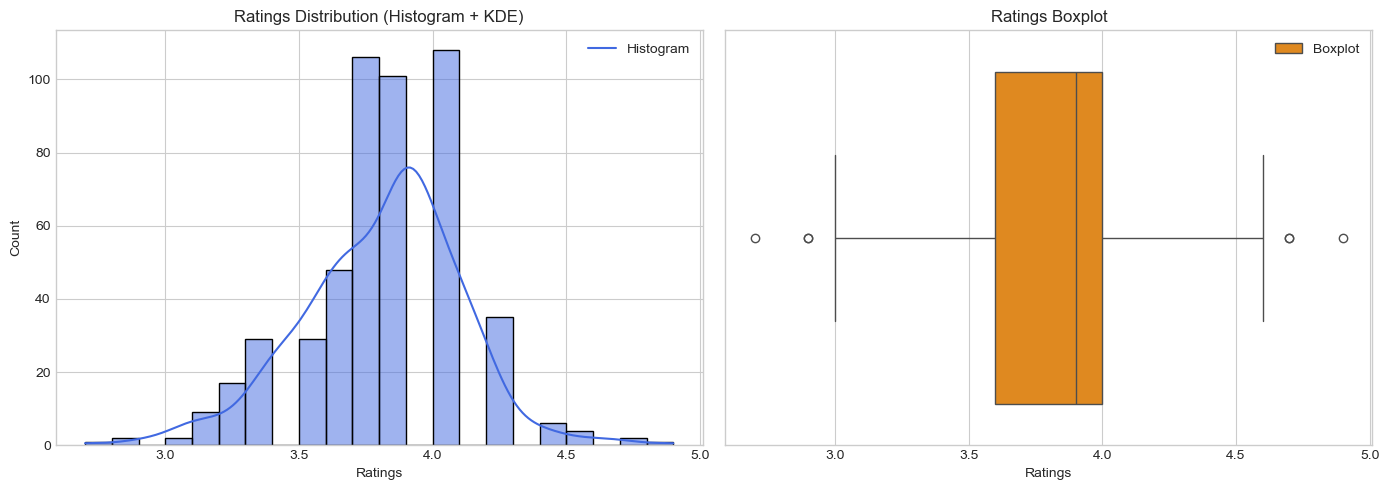

In [50]:
# Distribution of ratings
plt.style.use("seaborn-v0_8-whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE
sns.histplot(df_1['Ratings'], kde=True, color='royalblue', ax=axes[0])
axes[0].set_title("Ratings Distribution (Histogram + KDE)")
axes[0].set_xlabel("Ratings")
axes[0].legend(["Histogram"])

# Boxplot
sns.boxplot(x=df_1['Ratings'], color='darkorange', ax=axes[1])
axes[1].set_title("Ratings Boxplot")
axes[1].set_xlabel("Ratings")
axes[1].legend(["Boxplot"])

plt.tight_layout()
plt.show()

## Insights
- Most of the company ratings lies between 3.5 to 4.0 as we can see with the help of histogram and boxplot.
- There are vey less company whose ratings touch nearly to 5.0.

In [51]:
df_1['Salary'].max()

3831249.0

In [52]:
bins = [0, 500000, 1000000, 2000000, 3000000, 4000000]
labels = ['0–5L', '5L–10L', '10L–20L', '20L–30L', '30L–40L']

df_1['Salary_Range'] = pd.cut(df_1['Salary'], bins=bins, labels=labels)

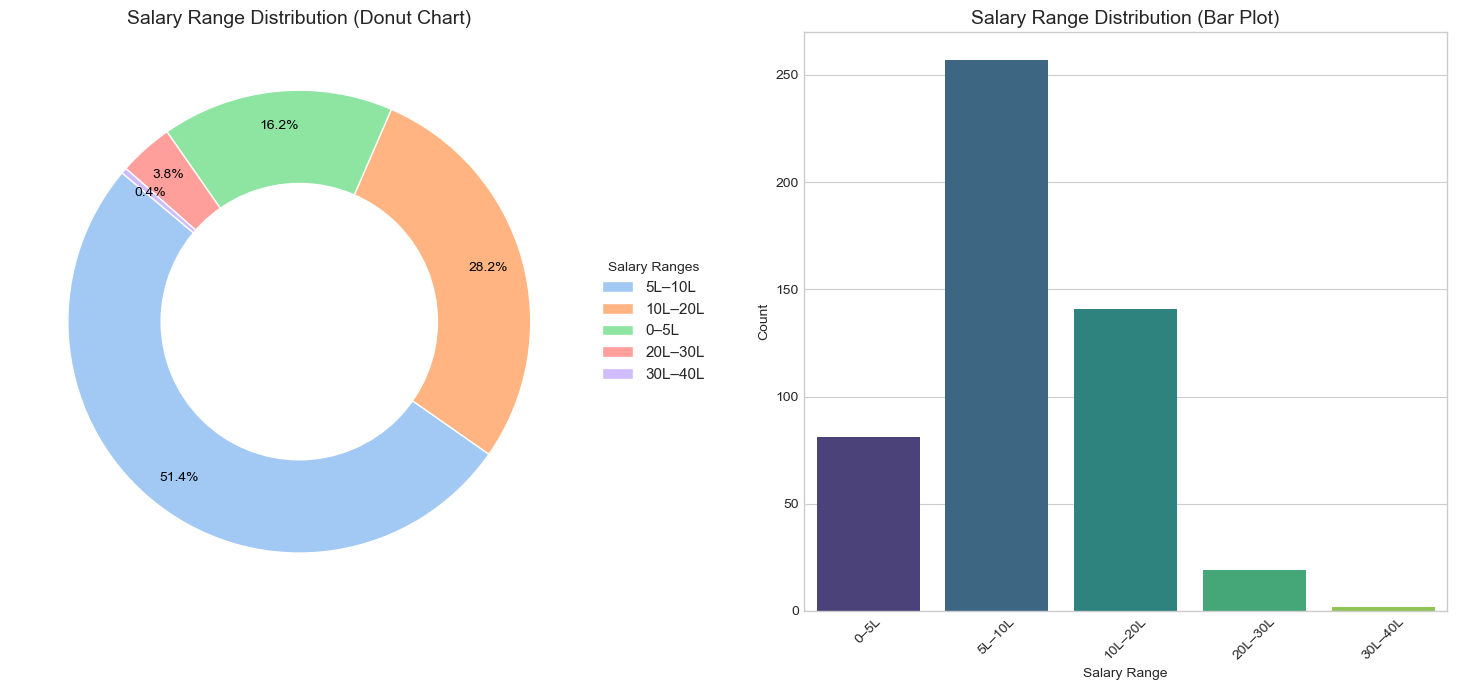

In [53]:
#Distribution of Salary
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

salary_counts = df_1['Salary_Range'].value_counts()

# ========= 1) DONUT CHART =========
colors = sns.color_palette("pastel")

# Create donut (pie with a hole)
wedges, texts, autotexts = axes[0].pie(
    salary_counts,
    labels=None,                 # remove labels inside
    autopct='%1.1f%%',
    pctdistance=0.85,            # position % values neatly
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Create center hole
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
axes[0].add_artist(centre_circle)

# Style percentage text
for a in autotexts:
    a.set_color('black')
    a.set_fontsize(10)

# Add legend outside
axes[0].legend(
    wedges,
    salary_counts.index,
    title="Salary Ranges",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

axes[0].set_title("Salary Range Distribution (Donut Chart)", fontsize=14)


# ========= 2) BAR PLOT =========
sns.barplot(
    x=salary_counts.index,
    y=salary_counts.values,
    ax=axes[1],
    palette="viridis"
)

axes[1].set_title("Salary Range Distribution (Bar Plot)", fontsize=14)
axes[1].set_xlabel("Salary Range")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

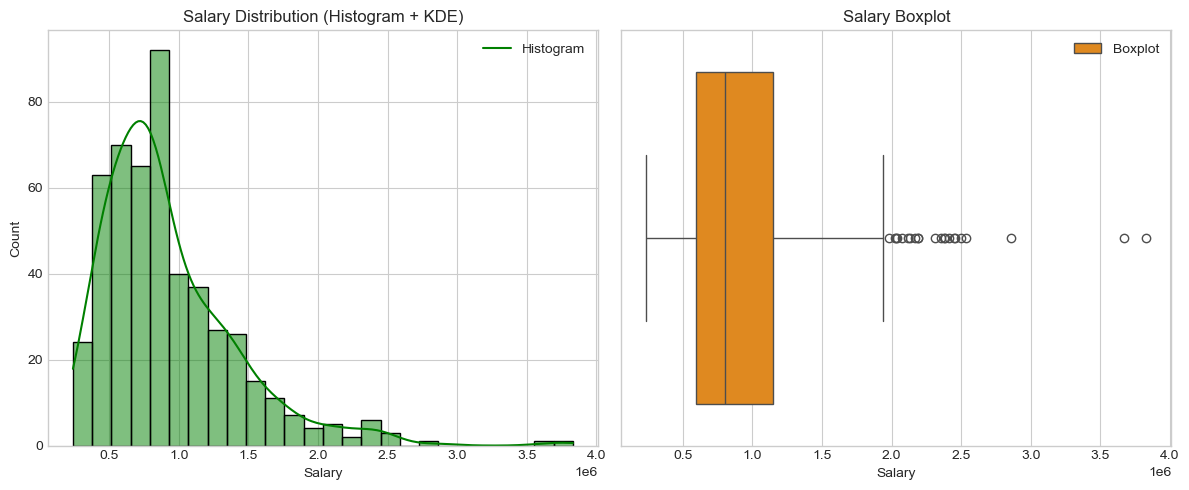

In [54]:
#Distribution of Salary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram + KDE
sns.histplot(df_1['Salary'], kde=True, color='green', ax=axes[0])
axes[0].set_title("Salary Distribution (Histogram + KDE)")
axes[0].set_xlabel("Salary")
axes[0].legend(["Histogram"])

# Boxplot
sns.boxplot(x=df_1['Salary'], color='darkorange', ax=axes[1])
axes[1].set_title("Salary Boxplot")
axes[1].set_xlabel("Salary")
axes[1].legend(["Boxplot"])

plt.tight_layout()
plt.show()

## Insights
- Most of of the salary ranges is between 5 lakhs to 10 lakhs  with maximum count.
- There are very less companies whose average salary touches to 40 lakhs. 

In [153]:
#Distribution of Reviews

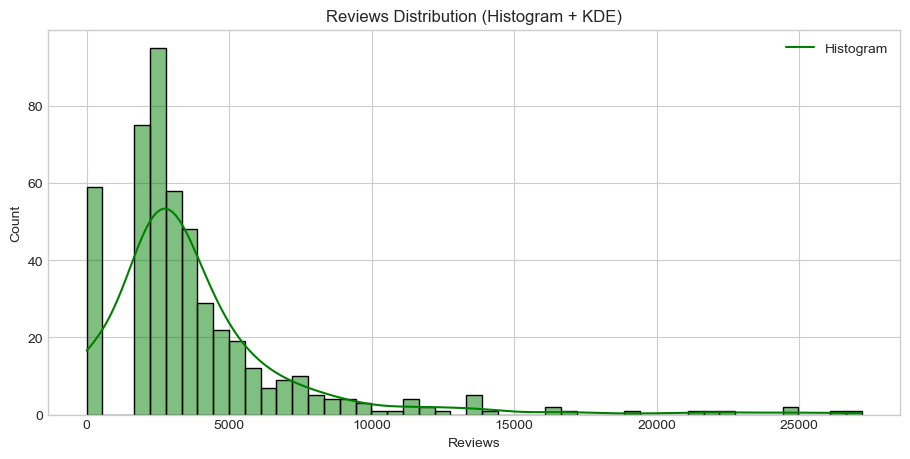

In [154]:
plt.figure(figsize=(11, 5))

# Histogram + KDE
sns.histplot(df_1[df_1['Reviews']<30000]['Reviews'], kde=True, color='green')
plt.title("Reviews Distribution (Histogram + KDE)")
plt.xlabel("Reviews")
plt.legend(["Histogram"])
plt.show()

## Insights
- The reviews count is more within 10k reviews
- As we can see there are very negligible amount of reviews near 1L.

In [155]:
df_1['Jobs'].describe()

count      500.000000
mean       229.602000
std       1796.017211
min          0.000000
25%          0.000000
50%         34.000000
75%        108.000000
max      38900.000000
Name: Jobs, dtype: float64

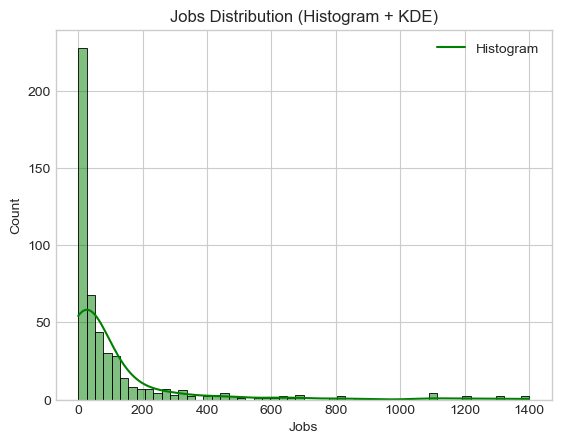

In [156]:
#Number of jobs per company
sns.histplot(df_1[df_1['Jobs']<1500]['Jobs'], kde=True, color='green')
plt.title("Jobs Distribution (Histogram + KDE)")
plt.xlabel("Jobs")
plt.legend(["Histogram"])
plt.show()

## Insights
- The number of jobs offered by most of the companies lies within 200.


In [157]:
df_1['Benefits'].min()

0.0

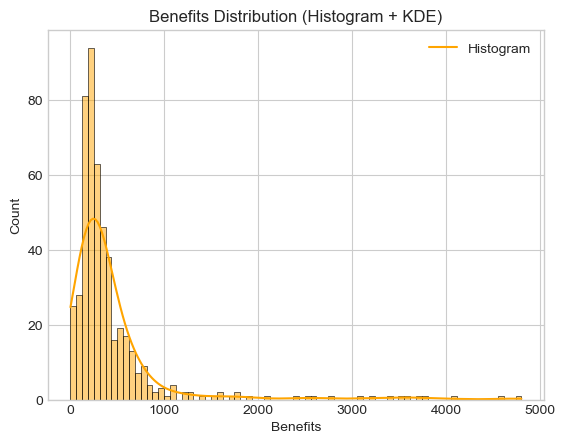

In [158]:
#Benefits

sns.histplot(df_1[df_1['Benefits']<5000]['Benefits'], kde=True, color='orange')
plt.title("Benefits Distribution (Histogram + KDE)")
plt.xlabel("Benefits")
plt.legend(["Histogram"])
plt.show()

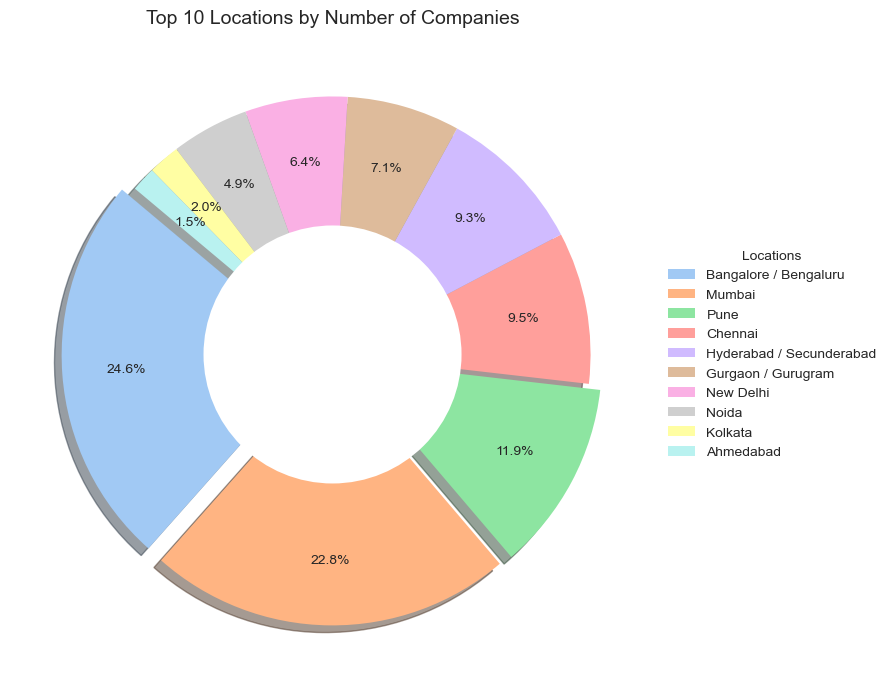

In [159]:
#Top locations
location_counts = df_1['Location'].value_counts().head(10)

plt.figure(figsize=(9,9))

colors = sns.color_palette("pastel")

# Explode top 3 locations
explode = [0.05 if i < 3 else 0 for i in range(len(location_counts))]

wedges, texts, autotexts = plt.pie(
    location_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    pctdistance=0.75
)

# Convert to donut style
centre_circle = plt.Circle((0,0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(
    wedges,
    location_counts.index,
    title="Locations",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Top 10 Locations by Number of Companies", fontsize=14)
plt.tight_layout()
plt.show()



## Insights
- Most of the companies present in Banglore followed by Mumbai.


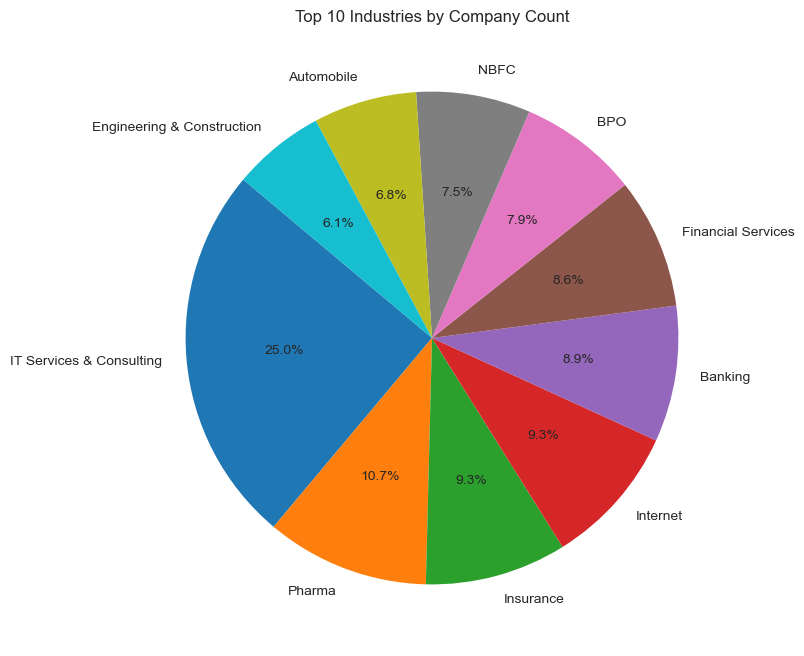

In [160]:
# Top 10 industries
industry_counts = df_1['Industry'].value_counts().head(10)  

plt.figure(figsize=(8,8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Industries by Company Count")
plt.show()


## Insights
- IT Services and Consulting sector companies are the largest contributors.


## Bivaraiate Analysis

In [43]:
#To get the average salary to easily compare 
df_1['Salary'] = (df_1['Salary'].astype(str).str.replace(r'[^0-9.]', '', regex=True))
# Convert to float safely
df_1['Salary'] = pd.to_numeric(df_1['Salary'], errors='coerce')

In [44]:
df_1['Salary'].head()
df_1['Salary'].dtype

dtype('float64')

In [45]:
df_1['Average Salary'] = df_1['Salary'] / 100000

In [46]:
df_1['Average Salary']

0       9.37500
1      10.20249
2      10.64999
3      11.10250
4      11.05000
         ...   
495     6.83250
496     8.05000
497     6.30250
498     5.92000
499    20.74500
Name: Average Salary, Length: 500, dtype: float64

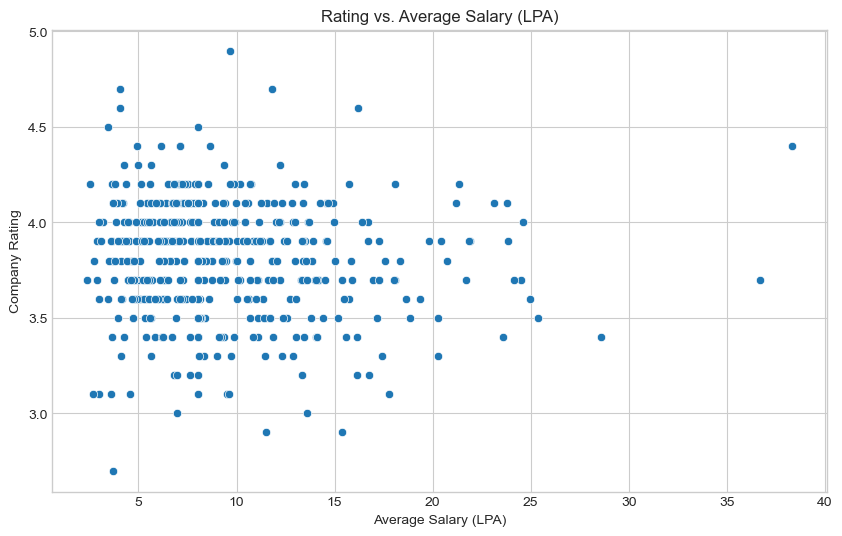

In [47]:
# Average Salary vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Average Salary', y='Ratings', data=df_1)
plt.title("Rating vs. Average Salary (LPA)")
plt.xlabel("Average Salary (LPA)")
plt.ylabel("Company Rating")
plt.show()

## Insights
- Most of the companies that provide average salary between 5 lkhs to 15 lakhs have a great ratings between 3.5 to 4.5 

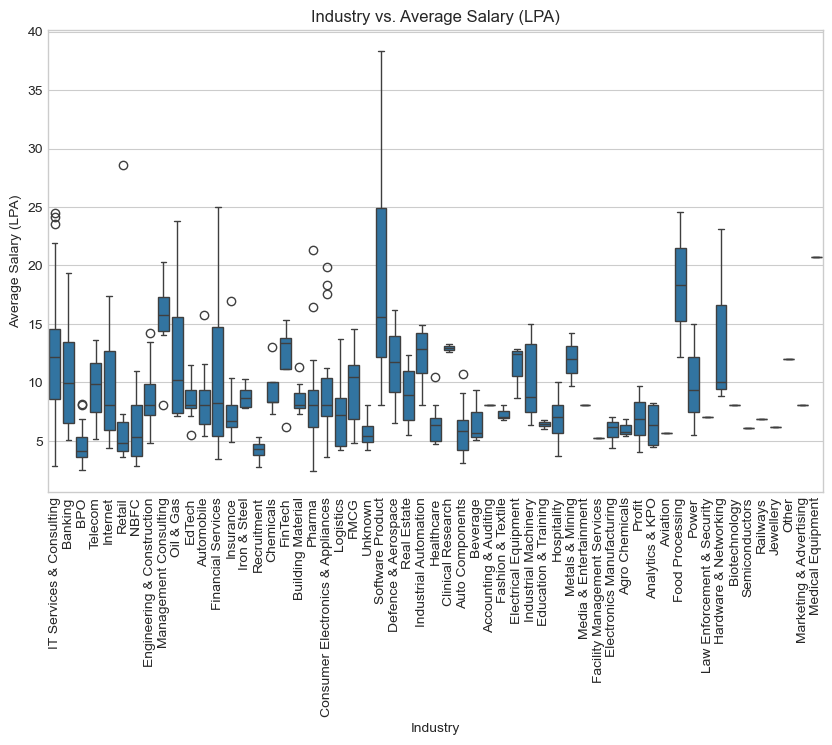

In [48]:
#Industry having average salary
plt.figure(figsize=(10,6))
sns.boxplot(x='Industry', y='Average Salary', data=df_1)
plt.xticks(rotation=90)
plt.title("Industry vs. Average Salary (LPA)")
plt.xlabel("Industry")
plt.ylabel("Average Salary (LPA)")
plt.show()

## Insights
- Software & Product and IT Services & Consulting show the highest salary ranges.
- Banks and Financial services too offer a great meadian salary. 

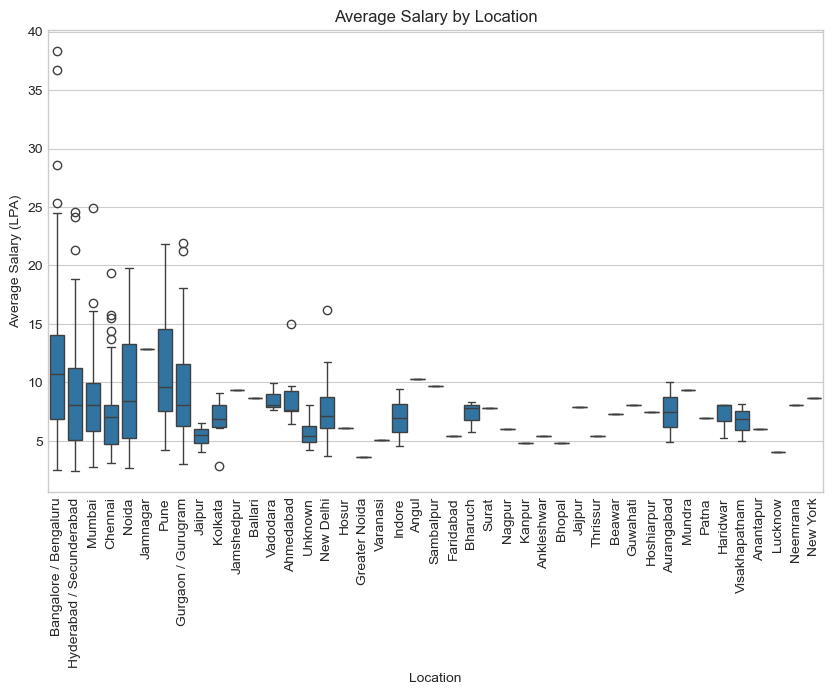

In [49]:
# Average salary based on location
plt.figure(figsize=(10,6))
sns.boxplot(x='Location', y='Average Salary', data=df_1)
plt.xticks(rotation=90)
plt.title("Average Salary by Location")
plt.xlabel("Location")
plt.ylabel("Average Salary (LPA)")
plt.show()

## Insights
- People working in Banglore, Noida and Pune get paid with average salary between 5 to 15 lakhs.
- Only few people working in Banglore get high paid who are skilled professional.  

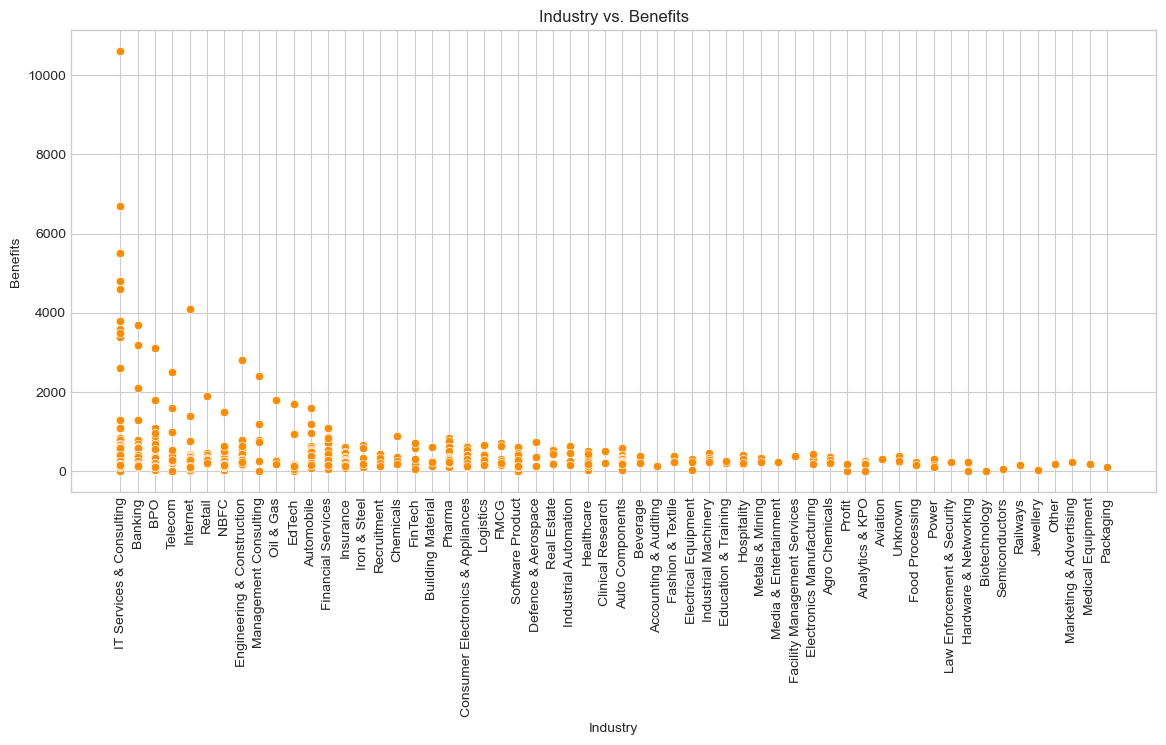

In [163]:
#Industries providing benefits
plt.figure(figsize=(14,6))
sns.scatterplot(x='Industry', y='Benefits', data=df_1,color='darkorange')
plt.xticks(rotation=90)
plt.title("Industry vs. Benefits")
plt.xlabel("Industry")
plt.ylabel("Benefits")
plt.show()

In [50]:
df_1['Reviews'] = (df_1['Reviews'].astype(str).str.replace(r'[^0-9.]', '', regex=True))
# Convert to float safely
df_1['Average Reviews'] = pd.to_numeric(df_1['Reviews'], errors='coerce')

In [51]:
df_1['Average Reviews']

0      110000.0
1       69300.0
2       61800.0
3       58800.0
4       50400.0
         ...   
495      1900.0
496      1900.0
497      1900.0
498      1900.0
499      1900.0
Name: Average Reviews, Length: 500, dtype: float64

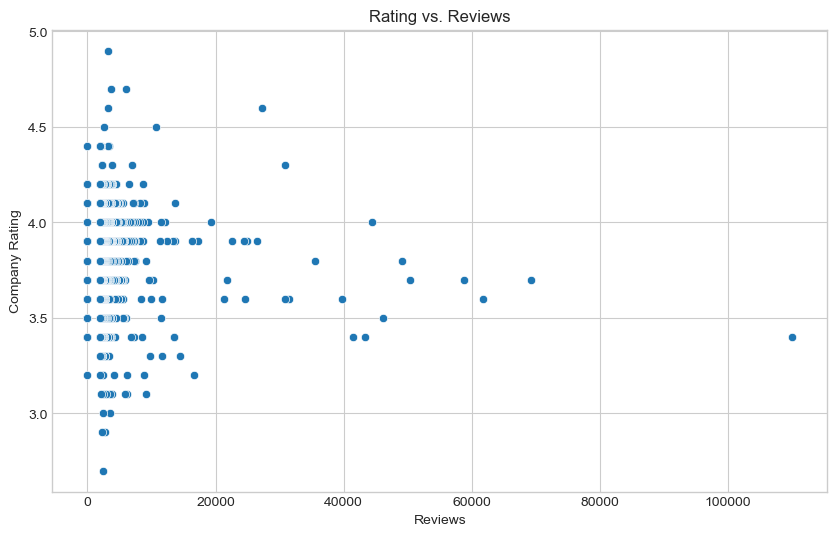

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Average Reviews', y='Ratings', data=df_1)
plt.title("Rating vs. Reviews")
plt.xlabel("Reviews")
plt.ylabel("Company Rating")
plt.show()

## Insights
- Companies having reviews less than 20k have good ratings between 3 to 4.5
- Some company that have reviews more than 20k have ratings 3.5 to 4
  

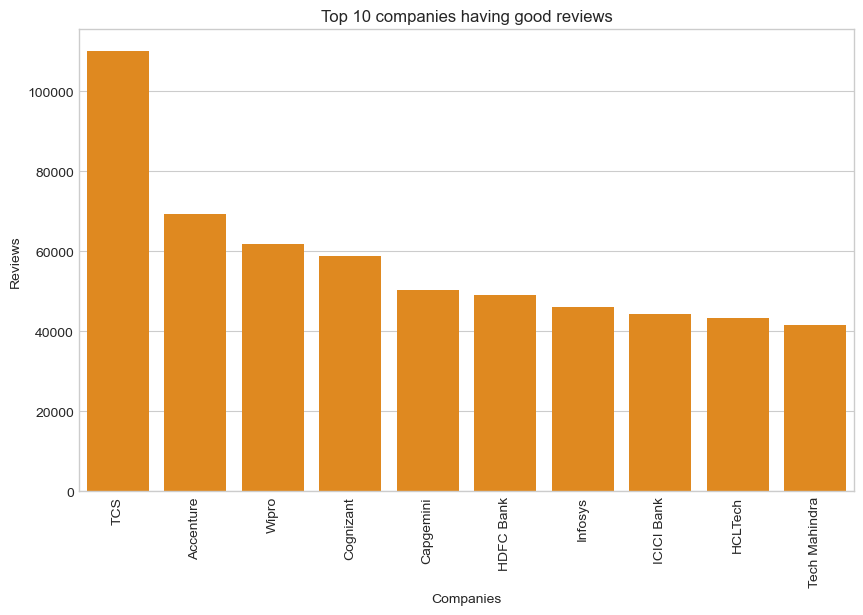

In [56]:
#Top 10 companies having good reviews
plt.figure(figsize=(10,6))
counts_df =df_1.head(10).reset_index()
sns.barplot(x='Company', y='Average Reviews', data=counts_df,color='darkorange')
plt.xticks(rotation=90)
plt.title("Top 10 companies having good reviews")
plt.xlabel("Companies")
plt.ylabel("Reviews")
plt.show()

## Insights 
- When it comes to top 10 comapnies, TCS marks the high reviews which marks high employee satisfaction and good to start carrer followed by other companies like Accenture, Wipro, Cognizant , etc

## Multivariate analysis

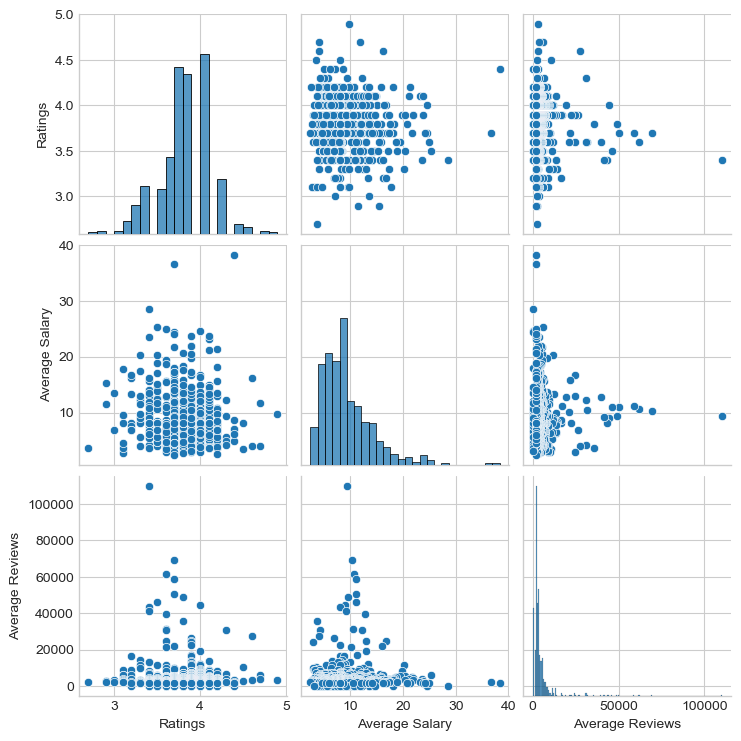

In [86]:
#Multivariate analysis to pair columns and compare
sns.pairplot(df_1[['Ratings', 'Average Salary', 'Average Reviews']])

## Insights
- Companies with ratings ranges between 3 to 4.5 have Average reviews within 20k
- Salaries tend to concentrate between 8 to 20 LPA, with a few outliers above that range.
- Companies with extremely high salaries do not necessarily have better ratings.
- High review count does not correlate strongly with salary or ratings.

Text(0.5, 1.0, 'Correlation between the numerical columns')

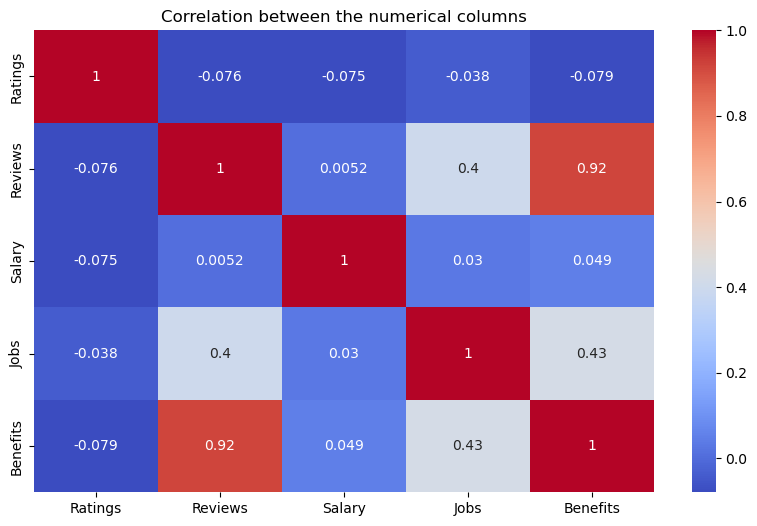

In [40]:
#Heatmap to find correlation
plt.figure(figsize=(10,6))
numeric_df = df_1.select_dtypes(include=['float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between the numerical columns")

## Insights
- Ratings have almost no correlation with Salary(-0.077), Jobs(-0.045), Interviews(-0.11) and Average reviews(-0.079). 
- Companies with more job openings tend to attract more reviews (Moderate positive - 0.43)
- People more likely review the interview questions being asked by the companies (Strong Positive - 0.84)

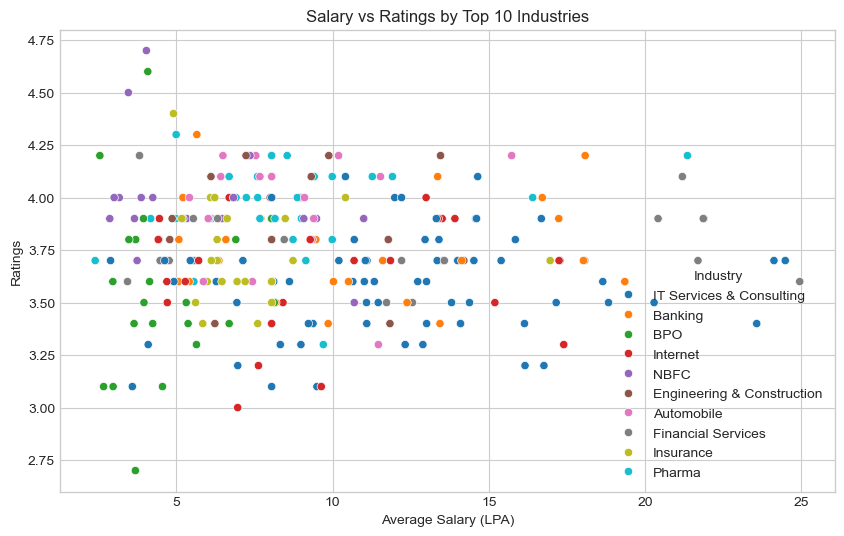

In [63]:
#To find the Salary vs Ratings by Industry
# Top 10 industries by count
top_10_industries = df_1['Industry'].value_counts().head(10).index
df_top10 = df_1[df_1['Industry'].isin(top_10_industries)]
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_top10, x='Average Salary', y='Ratings', hue='Industry')
plt.title("Salary vs Ratings by Top 10 Industries")
plt.xlabel("Average Salary (LPA)")
plt.ylabel("Ratings")
plt.legend(title="Industry")
plt.show()



## Insights
- Industries offering Average Salaries around 5 to 15 LPA have ratings between 3 to 4.5.
- Few industries whose average salary is more 15 LPA have ratings between 3 to 4

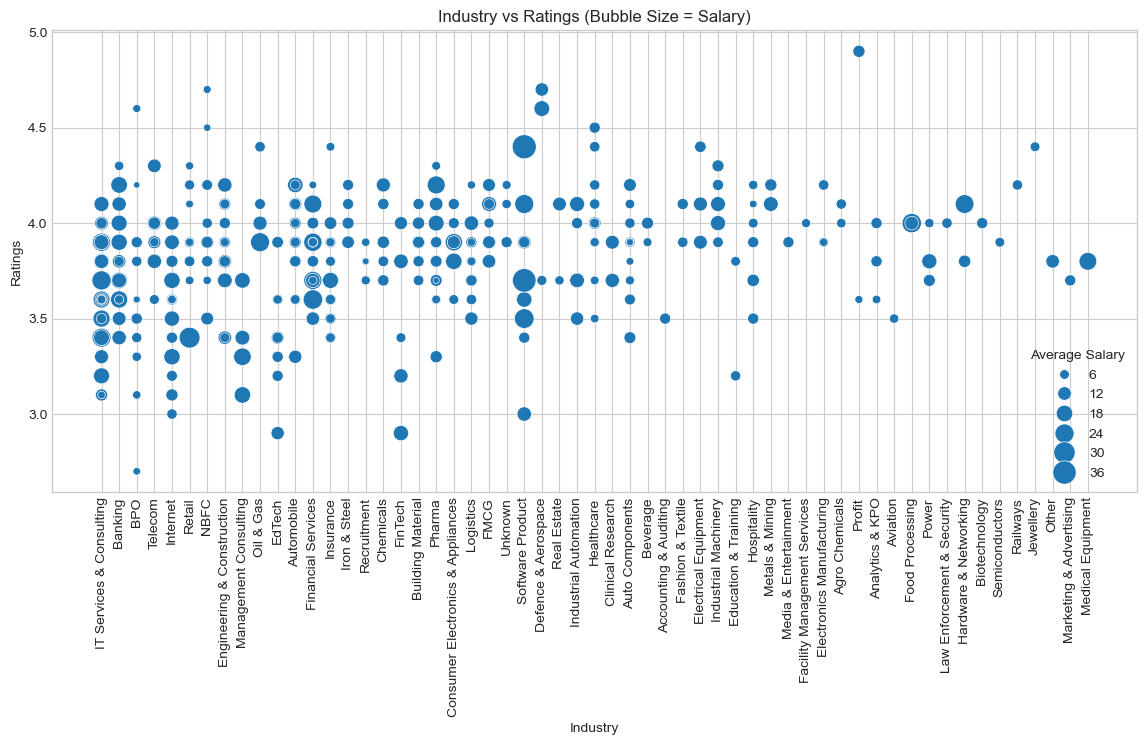

In [90]:
#To find Industry vs Ratings
plt.figure(figsize=(14,6))
sns.scatterplot(x='Industry', y='Ratings', size='Average Salary', sizes=(20, 300),data=df_1)
plt.xticks(rotation=90)
plt.title("Industry vs Ratings (Bubble Size = Salary)")
plt.show()
